In [2]:
import numpy as np 
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import importlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import sys
sys.path.append("/home/aurelien.stumpf/Code/visualize_neural_network/")
import VisualizeNN as VisNN
sys.path.append("/home/aurelien.stumpf/Code/")
import deep_project_package.compute_procrustes as compute_procrustes
import deep_project_package.dataset as dataset
import deep_project_package.models as models
import deep_project_package.training as training

In [71]:
importlib.reload(dataset)
importlib.reload(models)
importlib.reload(training)
importlib.reload(VisNN)
importlib.reload(compute_procrustes)

<module 'package.compute_procrustes' from '/home/aurelien.stumpf/Code/package/compute_procrustes.py'>

## Loading dataset

In [3]:
#synthetic function 
def f(x):
    return np.sum(x**2)

In [4]:
X = np.random.uniform(-3, 3, (10000, 4))
y = X[:, 0]*X[:, 1]*X[:, 2]*X[:, 3]

In [5]:
X = np.concatenate([np.random.uniform(-1, -0.3, (5000, 1)),np.random.uniform(0.3, 1, (5000, 1))], axis=0)
y = np.sin(2 * np.pi * X)

In [6]:
X = np.random.normal(0, 5, (1000, 10))
y = (X[:, 0]*X[:, 1])

#add all the possible multiplications
X_mult = X.copy()
for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        X_mult = np.concatenate((X_mult, (X[:, i]*X[:, j]).reshape(-1, 1)), axis=1)

In [7]:
#normalizer = Normalizer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
#X_train = normalizer.fit_transform(X_train)
X_test = torch.tensor(X_test, dtype=torch.float32)
#X_test = normalizer.transform(X_test)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [8]:
trainset = dataset.Dataset(X_train, y_train)
testset = dataset.Dataset(X_test, y_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=True)

In [11]:
X_train.shape

torch.Size([800, 10])

## Training

In [12]:
layer_sizes_list = [10, 20, 20, 1]

def f(x):
    return x

model = models.Quadratic_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier', type="regression")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss() #torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=50, verbose=True, factor=0.5)
training.train_model(model, trainloader, testloader, device, criterion, 1000, optimizer, scheduler=scheduler,type="regression")

/home/aurelien.stumpf/Code/deep_env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 0: 100%|██████████| 2/2 [00:00<00:00,  5.98batch/s, loss=1.45] 


Epoch 0
lr:  0.01
-------------------------
Test set: Avg. loss: 543.7878
-------------------------


Epoch 10: 100%|██████████| 2/2 [00:00<00:00, 119.71batch/s, loss=0.116]


Epoch 10
lr:  0.01
-------------------------
Test set: Avg. loss: 115.2025
-------------------------


Epoch 20: 100%|██████████| 2/2 [00:00<00:00, 112.56batch/s, loss=0.0224]


Epoch 20
lr:  0.01
-------------------------
Test set: Avg. loss: 54.2928
-------------------------


Epoch 30: 100%|██████████| 2/2 [00:00<00:00, 111.73batch/s, loss=0.00802]


Epoch 30
lr:  0.01
-------------------------
Test set: Avg. loss: 40.5811
-------------------------


Epoch 40: 100%|██████████| 2/2 [00:00<00:00, 113.93batch/s, loss=0.00421]


Epoch 40
lr:  0.01
-------------------------
Test set: Avg. loss: 35.8352
-------------------------


Epoch 50: 100%|██████████| 2/2 [00:00<00:00, 122.20batch/s, loss=0.00254]


Epoch 50
lr:  0.01
-------------------------
Test set: Avg. loss: 33.1006
-------------------------


Epoch 60: 100%|██████████| 2/2 [00:00<00:00, 112.93batch/s, loss=0.00176]


Epoch 60
lr:  0.01
-------------------------
Test set: Avg. loss: 31.5347
-------------------------


Epoch 70: 100%|██████████| 2/2 [00:00<00:00, 107.73batch/s, loss=0.00127]


Epoch 70
lr:  0.01
-------------------------
Test set: Avg. loss: 30.2060
-------------------------


Epoch 80: 100%|██████████| 2/2 [00:00<00:00, 100.59batch/s, loss=0.000936]


Epoch 80
lr:  0.01
-------------------------
Test set: Avg. loss: 29.4365
-------------------------


Epoch 90: 100%|██████████| 2/2 [00:00<00:00, 102.35batch/s, loss=0.000731]


Epoch 90
lr:  0.01
-------------------------
Test set: Avg. loss: 28.9878
-------------------------


Epoch 100: 100%|██████████| 2/2 [00:00<00:00, 103.75batch/s, loss=0.000612]


Epoch 100
lr:  0.01
-------------------------
Test set: Avg. loss: 28.5826
-------------------------


Epoch 110: 100%|██████████| 2/2 [00:00<00:00, 104.94batch/s, loss=0.000484]


Epoch 110
lr:  0.01
-------------------------
Test set: Avg. loss: 28.4493
-------------------------


Epoch 120: 100%|██████████| 2/2 [00:00<00:00, 85.82batch/s, loss=0.000387]


Epoch 120
lr:  0.01
-------------------------
Test set: Avg. loss: 27.9255
-------------------------


Epoch 130: 100%|██████████| 2/2 [00:00<00:00, 101.71batch/s, loss=0.000329]


Epoch 130
lr:  0.01
-------------------------
Test set: Avg. loss: 27.6685
-------------------------


Epoch 140: 100%|██████████| 2/2 [00:00<00:00, 81.85batch/s, loss=0.000262]


Epoch 140
lr:  0.01
-------------------------
Test set: Avg. loss: 27.4673
-------------------------


Epoch 150: 100%|██████████| 2/2 [00:00<00:00, 105.26batch/s, loss=0.000225]


Epoch 150
lr:  0.01
-------------------------
Test set: Avg. loss: 27.4540
-------------------------


Epoch 160: 100%|██████████| 2/2 [00:00<00:00, 108.63batch/s, loss=0.000205]


Epoch 160
lr:  0.01
-------------------------
Test set: Avg. loss: 27.2276
-------------------------


Epoch 170: 100%|██████████| 2/2 [00:00<00:00, 105.52batch/s, loss=0.000164]


Epoch 170
lr:  0.01
-------------------------
Test set: Avg. loss: 27.0192
-------------------------


Epoch 180: 100%|██████████| 2/2 [00:00<00:00, 114.83batch/s, loss=0.000136]


Epoch 180
lr:  0.01
-------------------------
Test set: Avg. loss: 26.9569
-------------------------


Epoch 190: 100%|██████████| 2/2 [00:00<00:00, 118.95batch/s, loss=0.00012]


Epoch 190
lr:  0.01
-------------------------
Test set: Avg. loss: 26.8583
-------------------------


Epoch 200: 100%|██████████| 2/2 [00:00<00:00, 117.68batch/s, loss=0.000115]


Epoch 200
lr:  0.01
-------------------------
Test set: Avg. loss: 26.7741
-------------------------


Epoch 210: 100%|██████████| 2/2 [00:00<00:00, 116.93batch/s, loss=8.86e-5]


Epoch 210
lr:  0.01
-------------------------
Test set: Avg. loss: 26.5313
-------------------------


Epoch 220: 100%|██████████| 2/2 [00:00<00:00, 119.42batch/s, loss=8.03e-5]


Epoch 220
lr:  0.01
-------------------------
Test set: Avg. loss: 26.5376
-------------------------


Epoch 230: 100%|██████████| 2/2 [00:00<00:00, 113.67batch/s, loss=7.37e-5]


Epoch 230
lr:  0.01
-------------------------
Test set: Avg. loss: 26.4146
-------------------------


Epoch 240: 100%|██████████| 2/2 [00:00<00:00, 122.10batch/s, loss=6.83e-5]


Epoch 240
lr:  0.01
-------------------------
Test set: Avg. loss: 26.4416
-------------------------


Epoch 250: 100%|██████████| 2/2 [00:00<00:00, 104.90batch/s, loss=9.61e-5]


Epoch 250
lr:  0.01
-------------------------
Test set: Avg. loss: 26.2736
-------------------------


Epoch 260: 100%|██████████| 2/2 [00:00<00:00, 98.73batch/s, loss=0.000198]


Epoch 260
lr:  0.01
-------------------------
Test set: Avg. loss: 26.5305
-------------------------


Epoch 270: 100%|██████████| 2/2 [00:00<00:00, 113.90batch/s, loss=0.000356]


Epoch 270
lr:  0.01
-------------------------
Test set: Avg. loss: 26.2903
-------------------------


Epoch 280: 100%|██████████| 2/2 [00:00<00:00, 114.50batch/s, loss=0.000424]


Epoch 280
lr:  0.01
-------------------------
Test set: Avg. loss: 25.8948
-------------------------


Epoch 290: 100%|██████████| 2/2 [00:00<00:00, 110.45batch/s, loss=0.000116]


Epoch 290
lr:  0.005
-------------------------
Test set: Avg. loss: 25.8517
-------------------------


Epoch 300: 100%|██████████| 2/2 [00:00<00:00, 123.93batch/s, loss=4.19e-5]


Epoch 300
lr:  0.005
-------------------------
Test set: Avg. loss: 25.6956
-------------------------


Epoch 310: 100%|██████████| 2/2 [00:00<00:00, 114.03batch/s, loss=3.3e-5]


Epoch 310
lr:  0.005
-------------------------
Test set: Avg. loss: 25.5968
-------------------------


Epoch 320: 100%|██████████| 2/2 [00:00<00:00, 124.19batch/s, loss=2.69e-5]


Epoch 320
lr:  0.005
-------------------------
Test set: Avg. loss: 25.5463
-------------------------


Epoch 330: 100%|██████████| 2/2 [00:00<00:00, 117.24batch/s, loss=2.47e-5]


Epoch 330
lr:  0.005
-------------------------
Test set: Avg. loss: 25.5023
-------------------------


Epoch 340: 100%|██████████| 2/2 [00:00<00:00, 117.29batch/s, loss=2.4e-5]


Epoch 340
lr:  0.005
-------------------------
Test set: Avg. loss: 25.4413
-------------------------


Epoch 350: 100%|██████████| 2/2 [00:00<00:00, 133.40batch/s, loss=2.22e-5]


Epoch 350
lr:  0.005
-------------------------
Test set: Avg. loss: 25.3735
-------------------------


Epoch 360: 100%|██████████| 2/2 [00:00<00:00, 132.10batch/s, loss=2.15e-5]


Epoch 360
lr:  0.005
-------------------------
Test set: Avg. loss: 25.3325
-------------------------


Epoch 370: 100%|██████████| 2/2 [00:00<00:00, 126.18batch/s, loss=2.01e-5]


Epoch 370
lr:  0.005
-------------------------
Test set: Avg. loss: 25.2885
-------------------------


Epoch 380: 100%|██████████| 2/2 [00:00<00:00, 134.25batch/s, loss=1.84e-5]


Epoch 380
lr:  0.005
-------------------------
Test set: Avg. loss: 25.2345
-------------------------


Epoch 390: 100%|██████████| 2/2 [00:00<00:00, 127.72batch/s, loss=1.91e-5]


Epoch 390
lr:  0.005
-------------------------
Test set: Avg. loss: 25.1820
-------------------------


Epoch 400: 100%|██████████| 2/2 [00:00<00:00, 130.87batch/s, loss=1.66e-5]


Epoch 400
lr:  0.005
-------------------------
Test set: Avg. loss: 25.1619
-------------------------


Epoch 410: 100%|██████████| 2/2 [00:00<00:00, 108.05batch/s, loss=1.72e-5]


Epoch 410
lr:  0.005
-------------------------
Test set: Avg. loss: 25.1261
-------------------------


Epoch 420: 100%|██████████| 2/2 [00:00<00:00, 99.16batch/s, loss=1.68e-5]


Epoch 420
lr:  0.005
-------------------------
Test set: Avg. loss: 25.0561
-------------------------


Epoch 430: 100%|██████████| 2/2 [00:00<00:00, 94.71batch/s, loss=1.44e-5]


Epoch 430
lr:  0.005
-------------------------
Test set: Avg. loss: 25.0158
-------------------------


Epoch 440: 100%|██████████| 2/2 [00:00<00:00, 88.48batch/s, loss=1.48e-5]


Epoch 440
lr:  0.005
-------------------------
Test set: Avg. loss: 24.9748
-------------------------


Epoch 450: 100%|██████████| 2/2 [00:00<00:00, 99.64batch/s, loss=1.41e-5]


Epoch 450
lr:  0.005
-------------------------
Test set: Avg. loss: 24.9308
-------------------------


Epoch 460: 100%|██████████| 2/2 [00:00<00:00, 92.43batch/s, loss=1.32e-5]


Epoch 460
lr:  0.005
-------------------------
Test set: Avg. loss: 24.8489
-------------------------


Epoch 470: 100%|██████████| 2/2 [00:00<00:00, 93.62batch/s, loss=1.36e-5]


Epoch 470
lr:  0.005
-------------------------
Test set: Avg. loss: 24.8035
-------------------------


Epoch 480: 100%|██████████| 2/2 [00:00<00:00, 100.89batch/s, loss=1.26e-5]


Epoch 480
lr:  0.005
-------------------------
Test set: Avg. loss: 24.7645
-------------------------


Epoch 490: 100%|██████████| 2/2 [00:00<00:00, 102.72batch/s, loss=1.1e-5]


Epoch 490
lr:  0.005
-------------------------
Test set: Avg. loss: 24.6910
-------------------------


Epoch 500: 100%|██████████| 2/2 [00:00<00:00, 94.59batch/s, loss=1.1e-5]


Epoch 500
lr:  0.005
-------------------------
Test set: Avg. loss: 24.6157
-------------------------


Epoch 510: 100%|██████████| 2/2 [00:00<00:00, 102.36batch/s, loss=1.04e-5]


Epoch 510
lr:  0.005
-------------------------
Test set: Avg. loss: 24.5423
-------------------------


Epoch 520: 100%|██████████| 2/2 [00:00<00:00, 123.37batch/s, loss=1.05e-5]


Epoch 520
lr:  0.005
-------------------------
Test set: Avg. loss: 24.4930
-------------------------


Epoch 530: 100%|██████████| 2/2 [00:00<00:00, 129.19batch/s, loss=1.01e-5]


Epoch 530
lr:  0.005
-------------------------
Test set: Avg. loss: 24.4378
-------------------------


Epoch 540: 100%|██████████| 2/2 [00:00<00:00, 126.44batch/s, loss=9.64e-6]


Epoch 540
lr:  0.005
-------------------------
Test set: Avg. loss: 24.3718
-------------------------


Epoch 550: 100%|██████████| 2/2 [00:00<00:00, 124.03batch/s, loss=9.23e-6]


Epoch 550
lr:  0.005
-------------------------
Test set: Avg. loss: 24.2865
-------------------------


Epoch 560: 100%|██████████| 2/2 [00:00<00:00, 104.71batch/s, loss=8.46e-6]


Epoch 560
lr:  0.005
-------------------------
Test set: Avg. loss: 24.2225
-------------------------


Epoch 570: 100%|██████████| 2/2 [00:00<00:00, 109.74batch/s, loss=8.76e-6]


Epoch 570
lr:  0.005
-------------------------
Test set: Avg. loss: 24.1344
-------------------------


Epoch 580: 100%|██████████| 2/2 [00:00<00:00, 95.93batch/s, loss=7.99e-6]


Epoch 580
lr:  0.005
-------------------------
Test set: Avg. loss: 24.1023
-------------------------


Epoch 590: 100%|██████████| 2/2 [00:00<00:00, 91.04batch/s, loss=8.03e-6]


Epoch 590
lr:  0.005
-------------------------
Test set: Avg. loss: 23.9963
-------------------------


Epoch 600: 100%|██████████| 2/2 [00:00<00:00, 104.13batch/s, loss=8.02e-6]


Epoch 600
lr:  0.005
-------------------------
Test set: Avg. loss: 23.9383
-------------------------


Epoch 610: 100%|██████████| 2/2 [00:00<00:00, 107.84batch/s, loss=7.63e-6]


Epoch 610
lr:  0.005
-------------------------
Test set: Avg. loss: 23.8839
-------------------------


Epoch 620: 100%|██████████| 2/2 [00:00<00:00, 110.60batch/s, loss=1e-5]


Epoch 620
lr:  0.005
-------------------------
Test set: Avg. loss: 23.7998
-------------------------


Epoch 630: 100%|██████████| 2/2 [00:00<00:00, 109.42batch/s, loss=2.01e-5]


Epoch 630
lr:  0.005
-------------------------
Test set: Avg. loss: 23.7808
-------------------------


Epoch 640: 100%|██████████| 2/2 [00:00<00:00, 110.91batch/s, loss=8.57e-5]


Epoch 640
lr:  0.005
-------------------------
Test set: Avg. loss: 23.9732
-------------------------


Epoch 650: 100%|██████████| 2/2 [00:00<00:00, 111.44batch/s, loss=0.000325]


Epoch 650
lr:  0.005
-------------------------
Test set: Avg. loss: 23.5177
-------------------------


Epoch 660: 100%|██████████| 2/2 [00:00<00:00, 109.91batch/s, loss=0.000372]


Epoch 660
lr:  0.0025
-------------------------
Test set: Avg. loss: 23.3527
-------------------------


Epoch 670: 100%|██████████| 2/2 [00:00<00:00, 104.38batch/s, loss=7.11e-5]


Epoch 670
lr:  0.0025
-------------------------
Test set: Avg. loss: 23.1258
-------------------------


Epoch 680: 100%|██████████| 2/2 [00:00<00:00, 132.54batch/s, loss=2.12e-5]


Epoch 680
lr:  0.0025
-------------------------
Test set: Avg. loss: 23.1645
-------------------------


Epoch 690: 100%|██████████| 2/2 [00:00<00:00, 117.25batch/s, loss=9.16e-6]


Epoch 690
lr:  0.0025
-------------------------
Test set: Avg. loss: 23.1965
-------------------------


Epoch 700: 100%|██████████| 2/2 [00:00<00:00, 110.64batch/s, loss=7.13e-6]


Epoch 700
lr:  0.0025
-------------------------
Test set: Avg. loss: 23.1566
-------------------------


Epoch 710: 100%|██████████| 2/2 [00:00<00:00, 118.13batch/s, loss=6.53e-6]


Epoch 710
lr:  0.0025
-------------------------
Test set: Avg. loss: 23.1167
-------------------------


Epoch 720: 100%|██████████| 2/2 [00:00<00:00, 104.59batch/s, loss=5.78e-6]


Epoch 720
lr:  0.0025
-------------------------
Test set: Avg. loss: 23.0941
-------------------------


Epoch 730: 100%|██████████| 2/2 [00:00<00:00, 97.89batch/s, loss=5.63e-6]


Epoch 730
lr:  0.0025
-------------------------
Test set: Avg. loss: 23.0575
-------------------------


Epoch 736:  50%|█████     | 1/2 [00:00<00:00, 58.59batch/s, loss=2.71e-6]


KeyboardInterrupt: 

In [13]:
layer_sizes_list = [10, 10, 10, 1]

def f(x):
    return x

model = models.Polynomial_MLP(4, layer_sizes_list, non_linearity="relu", initial_weights='xavier', type="regression")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss() #torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=100, verbose=True, factor=0.5)
training.train_model(model, trainloader, testloader, device, criterion, 1000, optimizer, scheduler=scheduler,type="regression")

linear1
quadratic1
cubic1
quartic1
linear2
linear3


Epoch 0: 100%|██████████| 2/2 [00:00<00:00, 68.59batch/s, loss=867]


Epoch 0
lr:  0.01
-------------------------
Test set: Avg. loss: 411865.1875
-------------------------


Epoch 4:   0%|          | 0/2 [00:00<?, ?batch/s]

Epoch 10: 100%|██████████| 2/2 [00:00<00:00, 80.31batch/s, loss=56.2]


Epoch 10
lr:  0.01
-------------------------
Test set: Avg. loss: 41631.6289
-------------------------


Epoch 20: 100%|██████████| 2/2 [00:00<00:00, 83.88batch/s, loss=11.8]


Epoch 20
lr:  0.01
-------------------------
Test set: Avg. loss: 40770.6250
-------------------------


Epoch 30: 100%|██████████| 2/2 [00:00<00:00, 95.28batch/s, loss=4.86]


Epoch 30
lr:  0.01
-------------------------
Test set: Avg. loss: 36698.5977
-------------------------


Epoch 40: 100%|██████████| 2/2 [00:00<00:00, 81.91batch/s, loss=1.84]


Epoch 40
lr:  0.01
-------------------------
Test set: Avg. loss: 35657.6953
-------------------------


Epoch 50: 100%|██████████| 2/2 [00:00<00:00, 84.65batch/s, loss=1.53]


Epoch 50
lr:  0.01
-------------------------
Test set: Avg. loss: 35598.9375
-------------------------


Epoch 60: 100%|██████████| 2/2 [00:00<00:00, 80.19batch/s, loss=1.4]


Epoch 60
lr:  0.01
-------------------------
Test set: Avg. loss: 35372.3828
-------------------------


Epoch 70: 100%|██████████| 2/2 [00:00<00:00, 88.25batch/s, loss=1.46]


Epoch 70
lr:  0.01
-------------------------
Test set: Avg. loss: 35634.4492
-------------------------


Epoch 80: 100%|██████████| 2/2 [00:00<00:00, 89.06batch/s, loss=1.28]


Epoch 80
lr:  0.01
-------------------------
Test set: Avg. loss: 36176.0156
-------------------------


Epoch 90: 100%|██████████| 2/2 [00:00<00:00, 94.65batch/s, loss=1.37]


Epoch 90
lr:  0.01
-------------------------
Test set: Avg. loss: 36420.4766
-------------------------


Epoch 100: 100%|██████████| 2/2 [00:00<00:00, 93.52batch/s, loss=1.28]


Epoch 100
lr:  0.01
-------------------------
Test set: Avg. loss: 36758.9141
-------------------------


Epoch 110: 100%|██████████| 2/2 [00:00<00:00, 91.70batch/s, loss=1.23]


Epoch 110
lr:  0.01
-------------------------
Test set: Avg. loss: 37801.6875
-------------------------


Epoch 120: 100%|██████████| 2/2 [00:00<00:00, 95.28batch/s, loss=1.15]


Epoch 120
lr:  0.01
-------------------------
Test set: Avg. loss: 38404.1758
-------------------------


Epoch 130: 100%|██████████| 2/2 [00:00<00:00, 97.92batch/s, loss=1.89]


Epoch 130
lr:  0.01
-------------------------
Test set: Avg. loss: 39146.8281
-------------------------


Epoch 140: 100%|██████████| 2/2 [00:00<00:00, 96.08batch/s, loss=3.65]


Epoch 140
lr:  0.01
-------------------------
Test set: Avg. loss: 39014.7148
-------------------------


Epoch 150: 100%|██████████| 2/2 [00:00<00:00, 98.09batch/s, loss=1.27]


Epoch 150
lr:  0.01
-------------------------
Test set: Avg. loss: 37261.3828
-------------------------


Epoch 160: 100%|██████████| 2/2 [00:00<00:00, 95.82batch/s, loss=1.18]


Epoch 160
lr:  0.01
-------------------------
Test set: Avg. loss: 37548.9883
-------------------------


Epoch 170: 100%|██████████| 2/2 [00:00<00:00, 97.68batch/s, loss=1.15]


Epoch 170
lr:  0.01
-------------------------
Test set: Avg. loss: 38088.5352
-------------------------


Epoch 180: 100%|██████████| 2/2 [00:00<00:00, 91.83batch/s, loss=1.08]


Epoch 180
lr:  0.01
-------------------------
Test set: Avg. loss: 38473.7109
-------------------------


Epoch 190: 100%|██████████| 2/2 [00:00<00:00, 87.43batch/s, loss=1]


Epoch 190
lr:  0.01
-------------------------
Test set: Avg. loss: 38669.1133
-------------------------


Epoch 200: 100%|██████████| 2/2 [00:00<00:00, 88.34batch/s, loss=1.03]


Epoch 200
lr:  0.01
-------------------------
Test set: Avg. loss: 39052.3984
-------------------------


Epoch 210: 100%|██████████| 2/2 [00:00<00:00, 87.74batch/s, loss=1.03]


Epoch 210
lr:  0.01
-------------------------
Test set: Avg. loss: 39573.0000
-------------------------


Epoch 220: 100%|██████████| 2/2 [00:00<00:00, 96.13batch/s, loss=1.02]


Epoch 220
lr:  0.01
-------------------------
Test set: Avg. loss: 39936.9492
-------------------------


Epoch 230: 100%|██████████| 2/2 [00:00<00:00, 95.47batch/s, loss=1.03]


Epoch 230
lr:  0.01
-------------------------
Test set: Avg. loss: 40121.4609
-------------------------


Epoch 240: 100%|██████████| 2/2 [00:00<00:00, 91.59batch/s, loss=0.992]


Epoch 240
lr:  0.01
-------------------------
Test set: Avg. loss: 40383.8984
-------------------------


Epoch 250: 100%|██████████| 2/2 [00:00<00:00, 85.24batch/s, loss=1.01]


Epoch 250
lr:  0.01
-------------------------
Test set: Avg. loss: 40601.3398
-------------------------


Epoch 260: 100%|██████████| 2/2 [00:00<00:00, 93.24batch/s, loss=0.924]


Epoch 260
lr:  0.01
-------------------------
Test set: Avg. loss: 40775.1992
-------------------------


Epoch 270: 100%|██████████| 2/2 [00:00<00:00, 98.22batch/s, loss=0.932]


Epoch 270
lr:  0.01
-------------------------
Test set: Avg. loss: 41047.5469
-------------------------


Epoch 280: 100%|██████████| 2/2 [00:00<00:00, 99.51batch/s, loss=0.938]


Epoch 280
lr:  0.01
-------------------------
Test set: Avg. loss: 41145.6289
-------------------------


Epoch 290: 100%|██████████| 2/2 [00:00<00:00, 98.98batch/s, loss=0.963]


Epoch 290
lr:  0.01
-------------------------
Test set: Avg. loss: 41245.2930
-------------------------


Epoch 300: 100%|██████████| 2/2 [00:00<00:00, 98.77batch/s, loss=0.941]


Epoch 300
lr:  0.01
-------------------------
Test set: Avg. loss: 41283.7031
-------------------------


Epoch 310: 100%|██████████| 2/2 [00:00<00:00, 99.89batch/s, loss=0.929]


Epoch 310
lr:  0.01
-------------------------
Test set: Avg. loss: 41435.7891
-------------------------


Epoch 320: 100%|██████████| 2/2 [00:00<00:00, 98.47batch/s, loss=0.935]


Epoch 320
lr:  0.01
-------------------------
Test set: Avg. loss: 41518.8867
-------------------------


Epoch 330: 100%|██████████| 2/2 [00:00<00:00, 97.65batch/s, loss=1.03]


Epoch 330
lr:  0.01
-------------------------
Test set: Avg. loss: 41581.0039
-------------------------


Epoch 340: 100%|██████████| 2/2 [00:00<00:00, 97.03batch/s, loss=0.897]


Epoch 340
lr:  0.01
-------------------------
Test set: Avg. loss: 41268.5898
-------------------------


Epoch 350: 100%|██████████| 2/2 [00:00<00:00, 103.87batch/s, loss=0.87]


Epoch 350
lr:  0.01
-------------------------
Test set: Avg. loss: 41101.8477
-------------------------


Epoch 360: 100%|██████████| 2/2 [00:00<00:00, 102.11batch/s, loss=0.859]


Epoch 360
lr:  0.01
-------------------------
Test set: Avg. loss: 41387.2461
-------------------------


Epoch 370: 100%|██████████| 2/2 [00:00<00:00, 100.77batch/s, loss=0.887]


Epoch 370
lr:  0.01
-------------------------
Test set: Avg. loss: 40421.0547
-------------------------


Epoch 380: 100%|██████████| 2/2 [00:00<00:00, 91.24batch/s, loss=0.887]


Epoch 380
lr:  0.01
-------------------------
Test set: Avg. loss: 39048.9023
-------------------------


Epoch 390: 100%|██████████| 2/2 [00:00<00:00, 100.05batch/s, loss=0.973]


Epoch 390
lr:  0.01
-------------------------
Test set: Avg. loss: 39944.1211
-------------------------


Epoch 400: 100%|██████████| 2/2 [00:00<00:00, 102.95batch/s, loss=1.33]


Epoch 400
lr:  0.01
-------------------------
Test set: Avg. loss: 42343.1523
-------------------------


Epoch 410: 100%|██████████| 2/2 [00:00<00:00, 95.35batch/s, loss=0.905]


Epoch 410
lr:  0.01
-------------------------
Test set: Avg. loss: 41716.6328
-------------------------


Epoch 420: 100%|██████████| 2/2 [00:00<00:00, 96.83batch/s, loss=0.815]


Epoch 420
lr:  0.01
-------------------------
Test set: Avg. loss: 42096.8789
-------------------------


Epoch 430: 100%|██████████| 2/2 [00:00<00:00, 82.17batch/s, loss=0.836]


Epoch 430
lr:  0.01
-------------------------
Test set: Avg. loss: 42108.5352
-------------------------


Epoch 440: 100%|██████████| 2/2 [00:00<00:00, 93.31batch/s, loss=0.839]


Epoch 440
lr:  0.01
-------------------------
Test set: Avg. loss: 41957.1289
-------------------------


Epoch 450: 100%|██████████| 2/2 [00:00<00:00, 86.59batch/s, loss=0.788]


Epoch 450
lr:  0.01
-------------------------
Test set: Avg. loss: 42079.4648
-------------------------


Epoch 460: 100%|██████████| 2/2 [00:00<00:00, 84.96batch/s, loss=0.846]


Epoch 460
lr:  0.01
-------------------------
Test set: Avg. loss: 41900.4922
-------------------------


Epoch 470: 100%|██████████| 2/2 [00:00<00:00, 86.46batch/s, loss=0.798]


Epoch 470
lr:  0.01
-------------------------
Test set: Avg. loss: 41858.1680
-------------------------


Epoch 480: 100%|██████████| 2/2 [00:00<00:00, 88.27batch/s, loss=0.814]


Epoch 480
lr:  0.01
-------------------------
Test set: Avg. loss: 42717.3477
-------------------------


Epoch 490: 100%|██████████| 2/2 [00:00<00:00, 94.76batch/s, loss=0.765]


Epoch 490
lr:  0.01
-------------------------
Test set: Avg. loss: 42948.2188
-------------------------


Epoch 500: 100%|██████████| 2/2 [00:00<00:00, 86.43batch/s, loss=0.792]


Epoch 500
lr:  0.01
-------------------------
Test set: Avg. loss: 43072.7109
-------------------------


Epoch 510: 100%|██████████| 2/2 [00:00<00:00, 99.28batch/s, loss=0.699]


Epoch 510
lr:  0.01
-------------------------
Test set: Avg. loss: 42936.5234
-------------------------


Epoch 520: 100%|██████████| 2/2 [00:00<00:00, 91.43batch/s, loss=0.726]


Epoch 520
lr:  0.01
-------------------------
Test set: Avg. loss: 42853.8281
-------------------------


Epoch 530: 100%|██████████| 2/2 [00:00<00:00, 92.21batch/s, loss=0.848]


Epoch 530
lr:  0.01
-------------------------
Test set: Avg. loss: 42953.1523
-------------------------


Epoch 540: 100%|██████████| 2/2 [00:00<00:00, 93.54batch/s, loss=0.907]


Epoch 540
lr:  0.01
-------------------------
Test set: Avg. loss: 42883.9023
-------------------------


Epoch 550: 100%|██████████| 2/2 [00:00<00:00, 92.95batch/s, loss=0.892]


Epoch 550
lr:  0.01
-------------------------
Test set: Avg. loss: 41914.0039
-------------------------


Epoch 560: 100%|██████████| 2/2 [00:00<00:00, 93.03batch/s, loss=0.758]


Epoch 560
lr:  0.01
-------------------------
Test set: Avg. loss: 41716.3867
-------------------------


Epoch 570: 100%|██████████| 2/2 [00:00<00:00, 91.78batch/s, loss=0.891]


Epoch 570
lr:  0.01
-------------------------
Test set: Avg. loss: 41821.0000
-------------------------


Epoch 580: 100%|██████████| 2/2 [00:00<00:00, 93.92batch/s, loss=0.984]


Epoch 580
lr:  0.01
-------------------------
Test set: Avg. loss: 41945.4023
-------------------------


Epoch 590: 100%|██████████| 2/2 [00:00<00:00, 95.68batch/s, loss=0.938]


Epoch 590
lr:  0.01
-------------------------
Test set: Avg. loss: 42503.3047
-------------------------


Epoch 600: 100%|██████████| 2/2 [00:00<00:00, 94.67batch/s, loss=1.26]


Epoch 600
lr:  0.01
-------------------------
Test set: Avg. loss: 41525.3008
-------------------------


Epoch 610: 100%|██████████| 2/2 [00:00<00:00, 90.70batch/s, loss=1.46]


Epoch 610
lr:  0.01
-------------------------
Test set: Avg. loss: 40566.0273
-------------------------


Epoch 620: 100%|██████████| 2/2 [00:00<00:00, 98.61batch/s, loss=0.735]


Epoch 620
lr:  0.01
-------------------------
Test set: Avg. loss: 40147.9023
-------------------------


Epoch 630: 100%|██████████| 2/2 [00:00<00:00, 93.62batch/s, loss=0.748]


Epoch 630
lr:  0.01
-------------------------
Test set: Avg. loss: 39809.4141
-------------------------


Epoch 640: 100%|██████████| 2/2 [00:00<00:00, 96.43batch/s, loss=0.783]


Epoch 640
lr:  0.01
-------------------------
Test set: Avg. loss: 39607.1641
-------------------------


Epoch 650: 100%|██████████| 2/2 [00:00<00:00, 94.35batch/s, loss=1.35]


Epoch 650
lr:  0.01
-------------------------
Test set: Avg. loss: 38896.7500
-------------------------


Epoch 660: 100%|██████████| 2/2 [00:00<00:00, 98.83batch/s, loss=0.692]


Epoch 660
lr:  0.01
-------------------------
Test set: Avg. loss: 36755.3359
-------------------------


Epoch 670: 100%|██████████| 2/2 [00:00<00:00, 91.98batch/s, loss=0.728]


Epoch 670
lr:  0.01
-------------------------
Test set: Avg. loss: 36359.2383
-------------------------


Epoch 680: 100%|██████████| 2/2 [00:00<00:00, 91.95batch/s, loss=0.592]


Epoch 680
lr:  0.01
-------------------------
Test set: Avg. loss: 36289.7773
-------------------------


Epoch 690: 100%|██████████| 2/2 [00:00<00:00, 94.36batch/s, loss=0.637]


Epoch 690
lr:  0.01
-------------------------
Test set: Avg. loss: 35766.6133
-------------------------


Epoch 700: 100%|██████████| 2/2 [00:00<00:00, 96.41batch/s, loss=0.691]


Epoch 700
lr:  0.01
-------------------------
Test set: Avg. loss: 35345.6758
-------------------------


Epoch 710: 100%|██████████| 2/2 [00:00<00:00, 93.66batch/s, loss=0.648]


Epoch 710
lr:  0.01
-------------------------
Test set: Avg. loss: 34900.6406
-------------------------


Epoch 720: 100%|██████████| 2/2 [00:00<00:00, 97.37batch/s, loss=0.576]


Epoch 720
lr:  0.01
-------------------------
Test set: Avg. loss: 34349.1836
-------------------------


Epoch 730: 100%|██████████| 2/2 [00:00<00:00, 95.82batch/s, loss=0.576]


Epoch 730
lr:  0.01
-------------------------
Test set: Avg. loss: 34032.1680
-------------------------


Epoch 740: 100%|██████████| 2/2 [00:00<00:00, 95.72batch/s, loss=0.564]


Epoch 740
lr:  0.01
-------------------------
Test set: Avg. loss: 33311.3086
-------------------------


Epoch 750: 100%|██████████| 2/2 [00:00<00:00, 93.36batch/s, loss=0.577]


Epoch 750
lr:  0.01
-------------------------
Test set: Avg. loss: 32533.6211
-------------------------


Epoch 760: 100%|██████████| 2/2 [00:00<00:00, 93.88batch/s, loss=0.614]


Epoch 760
lr:  0.01
-------------------------
Test set: Avg. loss: 32441.5762
-------------------------


Epoch 770: 100%|██████████| 2/2 [00:00<00:00, 93.69batch/s, loss=1.3]


Epoch 770
lr:  0.01
-------------------------
Test set: Avg. loss: 32249.3711
-------------------------


Epoch 780: 100%|██████████| 2/2 [00:00<00:00, 95.24batch/s, loss=1.64]


Epoch 780
lr:  0.01
-------------------------
Test set: Avg. loss: 32719.9863
-------------------------


Epoch 790: 100%|██████████| 2/2 [00:00<00:00, 92.03batch/s, loss=1.6]


Epoch 790
lr:  0.01
-------------------------
Test set: Avg. loss: 33485.7109
-------------------------


Epoch 800: 100%|██████████| 2/2 [00:00<00:00, 88.89batch/s, loss=0.713]


Epoch 800
lr:  0.01
-------------------------
Test set: Avg. loss: 34436.2344
-------------------------


Epoch 810: 100%|██████████| 2/2 [00:00<00:00, 84.63batch/s, loss=0.698]


Epoch 810
lr:  0.01
-------------------------
Test set: Avg. loss: 33652.1406
-------------------------


Epoch 820: 100%|██████████| 2/2 [00:00<00:00, 82.83batch/s, loss=0.54]


Epoch 820
lr:  0.01
-------------------------
Test set: Avg. loss: 33225.3555
-------------------------


Epoch 821:   0%|          | 0/2 [00:00<?, ?batch/s]


KeyboardInterrupt: 

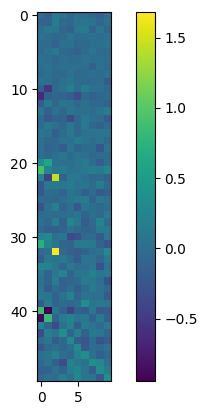

In [39]:
plt.imshow(model.q1.detach().cpu().numpy().T)
plt.colorbar()
plt.show()

In [197]:
layer_sizes_list = [1, 30, 30, 30, 1]

def f(x):
    return x

model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier_uniform', type="regression")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss() #torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=100, verbose=True, factor=0.5)
training.train_model(model, trainloader, testloader, device, criterion, 1000, optimizer, scheduler=scheduler,type="regression")

/home/aurelien.stumpf/Code/deep_env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 0
lr:  0.1
Training Loss
0.030723370522260665
Test Loss
Loss: 0.007796038269996643
-------------------------
Epoch 10
lr:  0.1
Training Loss
2.395758026978001e-06
Test Loss
Loss: 2.0569749176502226e-06
-------------------------
Epoch 20
lr:  0.1
Training Loss
1.5008569389465265e-06
Test Loss
Loss: 1.3620926765725017e-06
-------------------------
Epoch 30
lr:  0.1
Training Loss
9.598871076013893e-05
Test Loss
Loss: 4.862205125391483e-05
-------------------------
Epoch 40
lr:  0.1
Training Loss
1.3026416127104313e-06
Test Loss
Loss: 1.2301520619075746e-06
-------------------------
Epoch 50
lr:  0.1
Training Loss
1.723530744493473e-05
Test Loss
Loss: 8.385047665797174e-06
-------------------------
Epoch 60
lr:  0.1
Training Loss
1.553406667881063e-06
Test Loss
Loss: 4.824053612537682e-07
-------------------------
Epoch 70
lr:  0.1
Training Loss
2.952271912363358e-06
Test Loss
Loss: 2.4140711320796983e-07
-------------------------
Epoch 80
lr:  0.1
Training Loss
1.2288567158975638e-0

KeyboardInterrupt: 

In [44]:
layer_sizes_list = [10, 10, 10, 5, 1]

def f(x):
    return x

model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier',type="regression")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss() #NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=30, verbose=True, factor=0.5)
training.train_model_orthogonal(model, trainloader, testloader, device, criterion, 500, optimizer, scheduler=scheduler, type="regression")

Epoch 0
lr:  0.1
Training Loss
68.17391815185547
Test Loss
Loss: 52.25477355957031
-------------------------
Epoch 10
lr:  0.1
Training Loss
31.943813705444335
Test Loss
Loss: 36.47531616210937
-------------------------
Epoch 20
lr:  0.1
Training Loss
30.581549072265624
Test Loss
Loss: 41.12225524902344
-------------------------
Epoch 30
lr:  0.1
Training Loss
24.110786972045897
Test Loss
Loss: 28.901530151367187
-------------------------
Epoch 40
lr:  0.1
Training Loss
20.38874397277832
Test Loss
Loss: 22.005982360839845
-------------------------
Epoch 50
lr:  0.1
Training Loss
18.675106258392333
Test Loss
Loss: 17.661880874633788
-------------------------
Epoch 60
lr:  0.1
Training Loss
14.230666122436524
Test Loss
Loss: 13.628364791870117
-------------------------
Epoch 70
lr:  0.1
Training Loss
22.712457008361817
Test Loss
Loss: 23.43192932128906
-------------------------
Epoch 80
lr:  0.1
Training Loss
10.62579330444336
Test Loss
Loss: 13.304177322387694
-------------------------


In [15]:
layer_sizes_list = [10, 10, 10, 2]

def f(x):
    return x

model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier',type="classification")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=20, verbose=True, factor=0.5)
training.train_model_orthonormal(model, trainloader, testloader, device, criterion, 300, optimizer, scheduler=scheduler, type="classification")

Epoch 0
lr:  0.1
25.45027196407318
Training Loss
Accuracy: 64.5
Loss: 0.020905283764004707
Test Loss
Accuracy: 65.0
Loss: 0.022539880573749543
-------------------------


Epoch 10
lr:  0.1
12.77384102344513
Training Loss
Accuracy: 64.875
Loss: 0.021776388213038445
Test Loss
Accuracy: 72.5
Loss: 0.021932964622974397
-------------------------
Epoch 20
lr:  0.1
14.018135845661163
Training Loss
Accuracy: 59.25
Loss: 0.023496062085032462
Test Loss
Accuracy: 68.0
Loss: 0.022854183912277223
-------------------------
Epoch 30
lr:  0.1
15.594249814748764
Training Loss
Accuracy: 59.5
Loss: 0.022534137517213823
Test Loss
Accuracy: 68.5
Loss: 0.02287586748600006
-------------------------
Epoch 40
lr:  0.05
12.316976189613342
Training Loss
Accuracy: 69.0
Loss: 0.019084163196384906
Test Loss
Accuracy: 73.0
Loss: 0.01850002780556679
-------------------------
Epoch 50
lr:  0.05
11.894141525030136
Training Loss
Accuracy: 67.625
Loss: 0.019748670607805253
Test Loss
Accuracy: 74.5
Loss: 0.019072307199239733
-------------------------
Epoch 60
lr:  0.05
11.834800362586975
Training Loss
Accuracy: 67.375
Loss: 0.020759972631931304
Test Loss
Accuracy: 77.0
Loss: 0.018746235966

In [14]:
tab = np.concatenate([np.linspace(-1,1,1000).reshape(-1,1),np.random.normal(2,1,(1000,3))], axis=1)
#tab = np.concatenate([np.linspace(-15,15,1000).reshape(-1,1)], axis=1)
y = np.array([x[0]*x[1]*x[2]*x[3] for x in tab])
tab = torch.tensor(tab, dtype=torch.float32)
tab = tab.to(device)
model.eval()
pred = model(tab).detach().cpu().numpy()
plt.plot(np.linspace(-15,15,1000), y, label='true', color='blue', alpha=0.5)
plt.plot(np.linspace(-15,15,1000), pred, label='pred', color='red', alpha=0.5)
plt.xlim(-15,15)
plt.ylim(-2,10)
plt.legend()
plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1000x4 and 10x10)

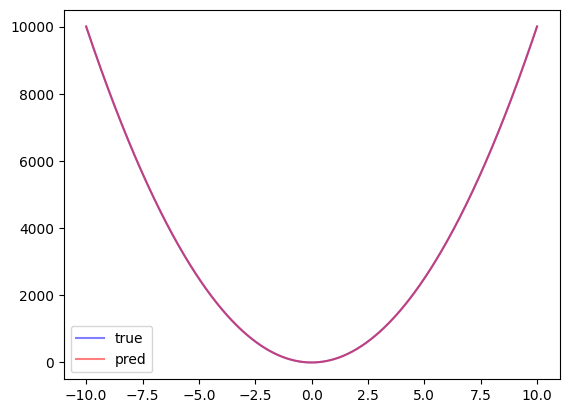

In [57]:
#tab = np.concatenate([np.linspace(-10,10,1000).reshape(-1,1), np.random.normal(0, 10, (1000,9))], axis=1)
tab = np.concatenate([np.linspace(-100,100,1000).reshape(-1,1)], axis=1)
y = np.array([x**2 for x in tab])
tab = torch.tensor(tab, dtype=torch.float32)
tab = tab.to(device)
model.eval()
pred = model(tab).detach().cpu().numpy()
plt.plot(np.linspace(-10,10,1000), y, label='true', color='blue', alpha=0.5)
plt.plot(np.linspace(-10,10,1000), pred, label='pred', color='red', alpha=0.5)
plt.legend()
plt.show()

## Visualization 

In [208]:
x = torch.tensor(np.random.normal(0, 5, (1, 10)), dtype=torch.float32)
print(x)
x = x.to(device)
model.eval()
pred = model(x).detach().cpu().numpy()
print(pred)

tensor([[ 2.1398,  7.2054,  0.3961, -1.4537, -0.2782, -1.1926, -0.5748, -4.1836,
          0.5136,  0.7212]])
[[-154376.36]]


W1


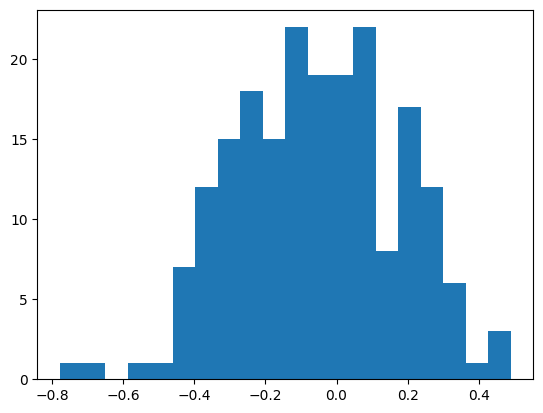

W2


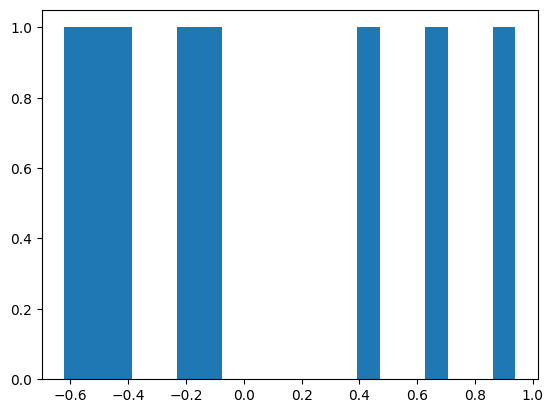

W3


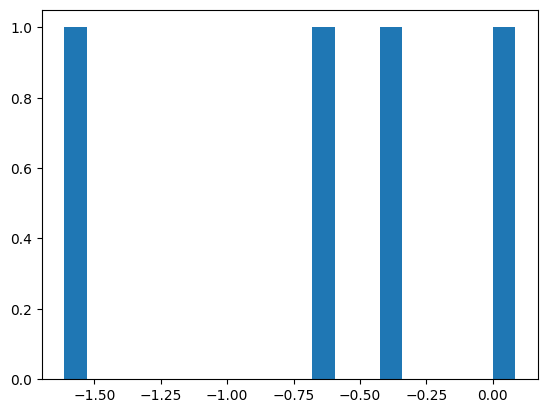

In [194]:
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    print(f'{layer[0]}')
    plt.hist(weights.flatten(), bins=20)
    plt.show()

layer0
degree_out


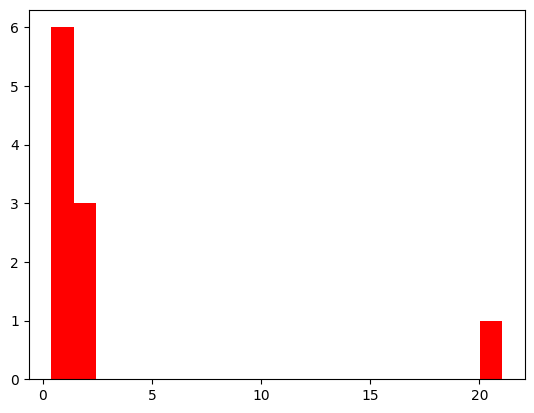

layer1
degree_in


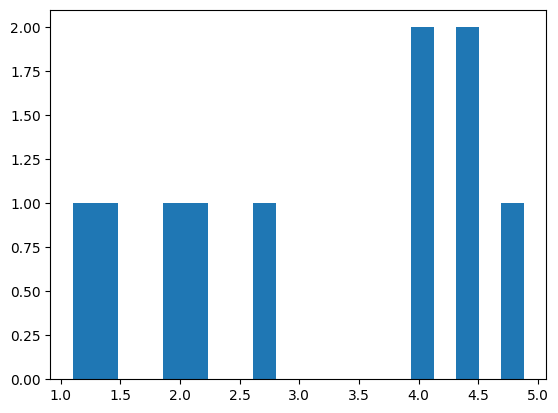

degree_out


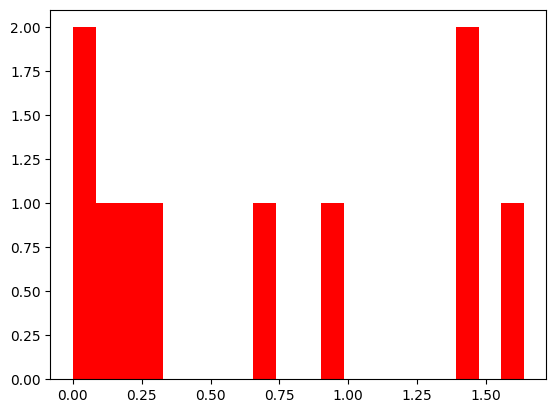

layer2
degree_in


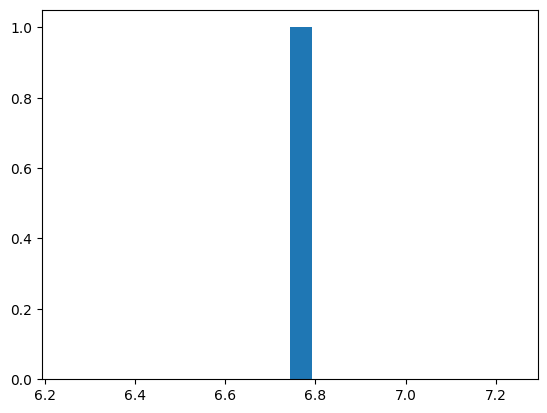

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        degree_out = np.sum(np.abs(weights), axis=0)
        print("degree_out")
        plt.hist(degree_out, bins=20, color='red')
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in = np.sum(np.abs(weights), axis=1)
        plt.hist(degree_in, bins=20)
        plt.show()

layer0
degree_out


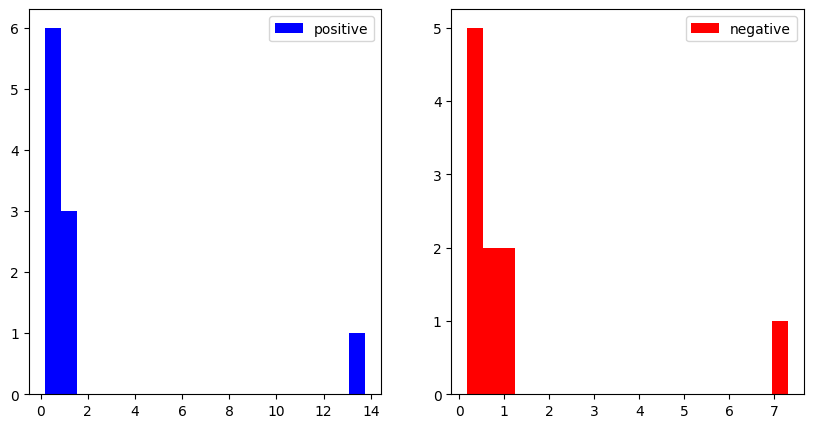

layer1
degree_in


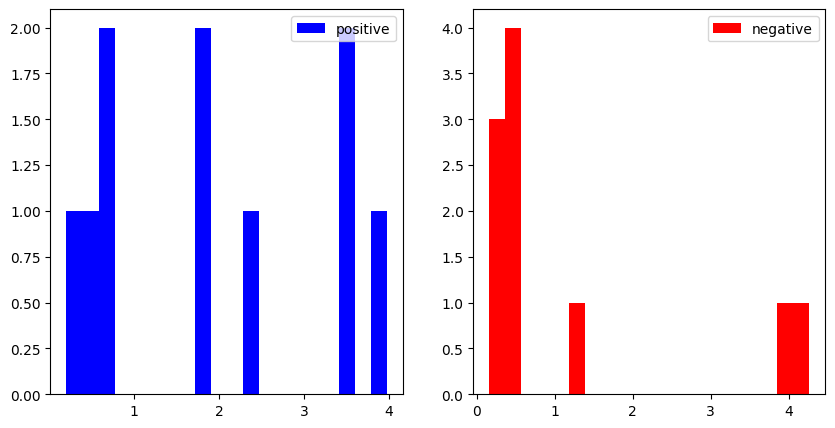

degree_out


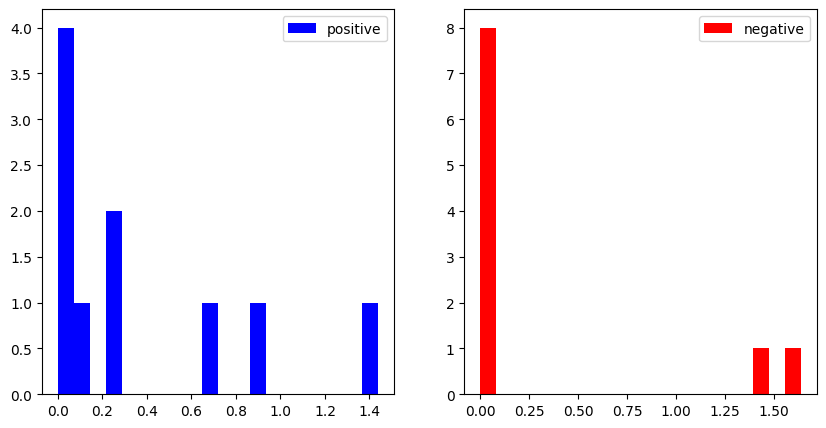

layer2
degree_in


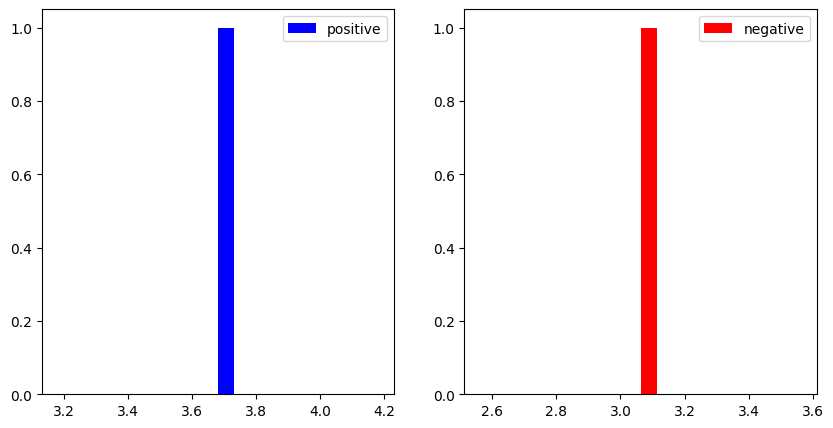

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        neg_weights = np.copy(weights)
        neg_weights[neg_weights > 0] = 0
        pos_weights = np.copy(weights)
        pos_weights[pos_weights < 0] = 0
        if i == 0:
            print("layer{}".format(i))
        print("degree_out")
        degree_out_neg = np.sum(np.abs(neg_weights), axis=0)
        degree_out_pos = np.sum(np.abs(pos_weights), axis=0)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(degree_out_pos, bins=20, color='blue')
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.hist(degree_out_neg, bins=20, color='red')
        plt.legend(['negative'])
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in_neg = np.sum(np.abs(neg_weights), axis=1)
        degree_in_pos = np.sum(np.abs(pos_weights), axis=1)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(degree_in_pos, bins=20, color='blue')
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.hist(degree_in_neg, bins=20, color='red')
        plt.legend(['negative'])
        plt.show()

layer0
degree_out


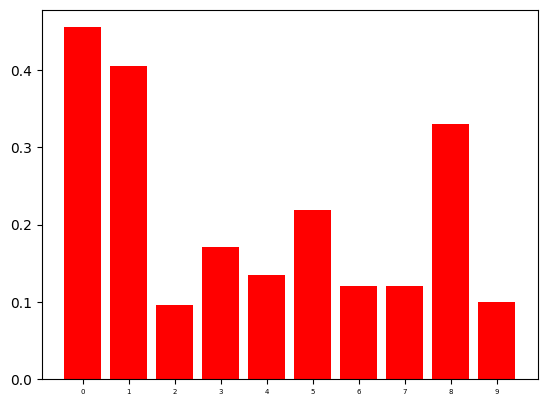

layer1
degree_in


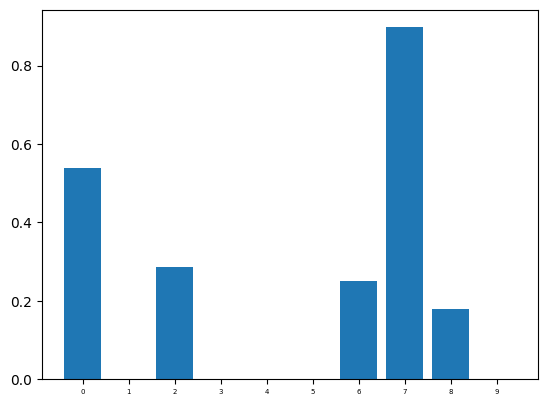

degree_out


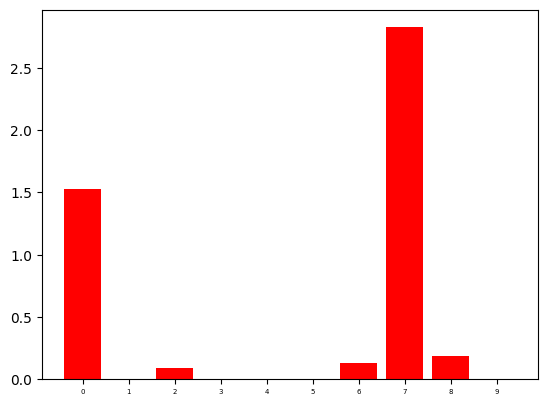

layer2
degree_in


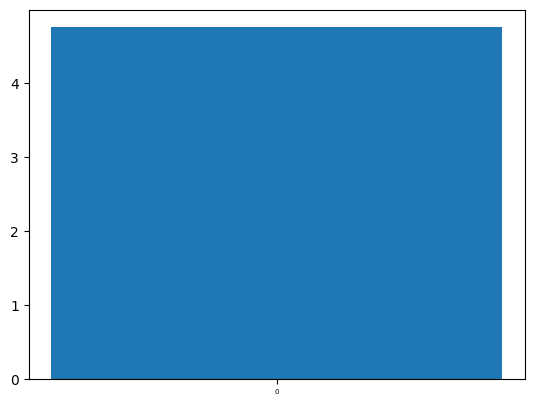

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        degree_out = np.sum(np.abs(weights), axis=0)
        print("degree_out")
        plt.bar(np.arange(weights.shape[1]),degree_out, color='red')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in = np.sum(np.abs(weights), axis=1)
        plt.bar(np.arange(weights.shape[0]),degree_in)
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.show()

layer0
degree_out


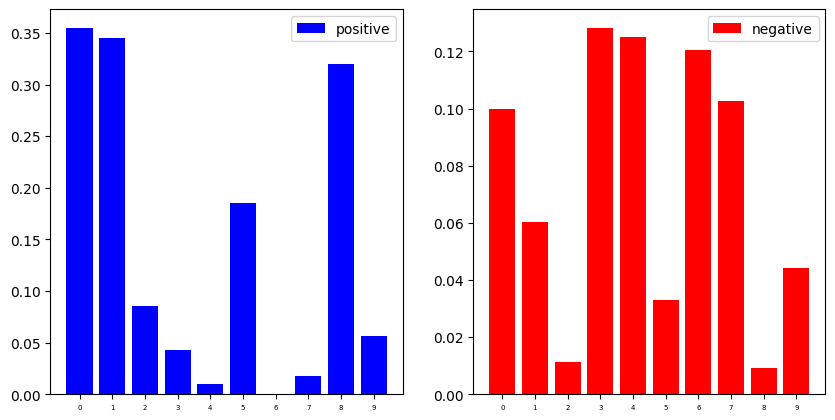

layer1
degree_in


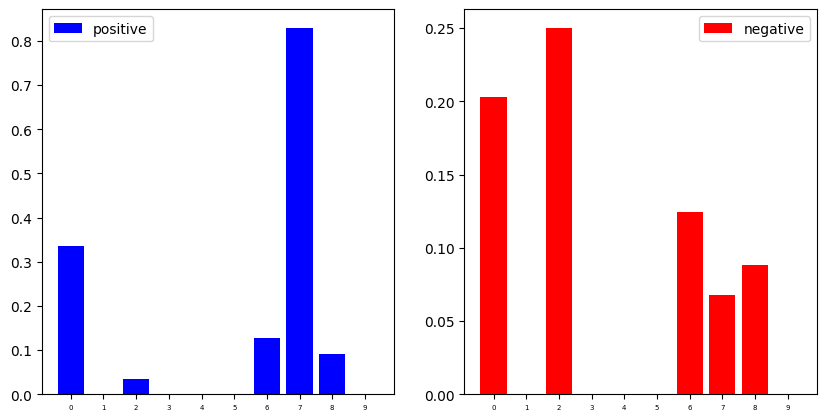

degree_out


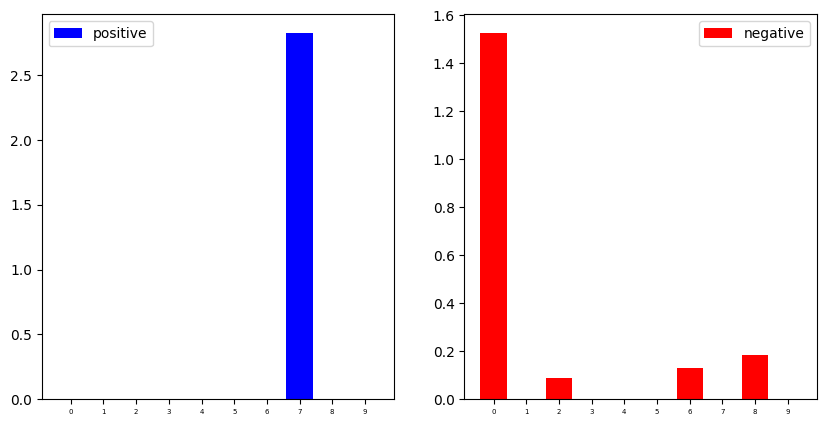

layer2
degree_in


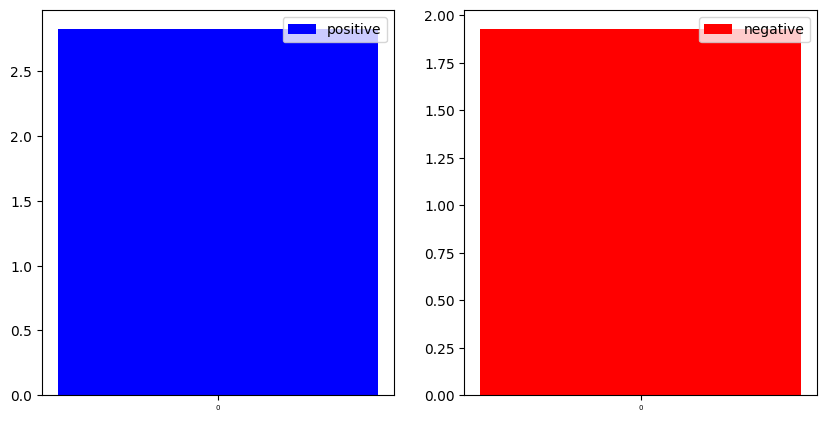

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        neg_weights = np.copy(weights)
        neg_weights[neg_weights > 0] = 0
        pos_weights = np.copy(weights)
        pos_weights[pos_weights < 0] = 0
        print("degree_out")
        degree_out_neg = np.sum(np.abs(neg_weights), axis=0)
        degree_out_pos = np.sum(np.abs(pos_weights), axis=0)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.bar(np.arange(weights.shape[1]),degree_out_pos, color='blue')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.bar(np.arange(weights.shape[1]),degree_out_neg, color='red')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.legend(['negative'])
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in_neg = np.sum(np.abs(neg_weights), axis=1)
        degree_in_pos = np.sum(np.abs(pos_weights), axis=1)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.bar(np.arange(weights.shape[0]),degree_in_pos, color='blue')
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.bar(np.arange(weights.shape[0]),degree_in_neg, color='red')
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.legend(['negative'])
        plt.show()

# Visualization

In [7]:
def get_model_params(model):
    params = []
    for layer in model.named_parameters():
        if "weight" in layer[0]:
            params.append(layer[1].cpu().detach().numpy().T)
    return params

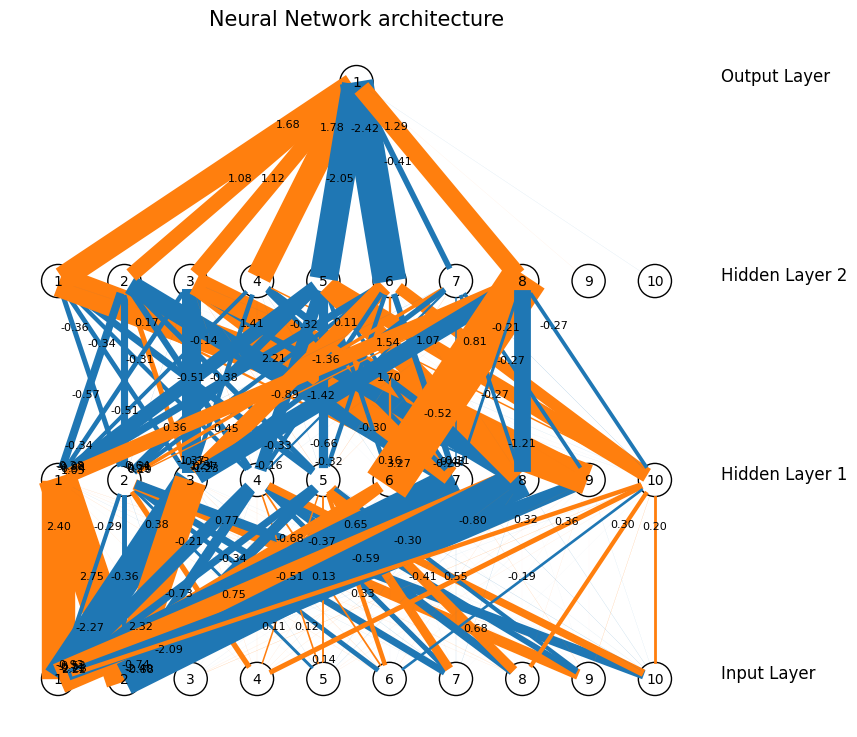

In [109]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.1, 10)
network.draw()

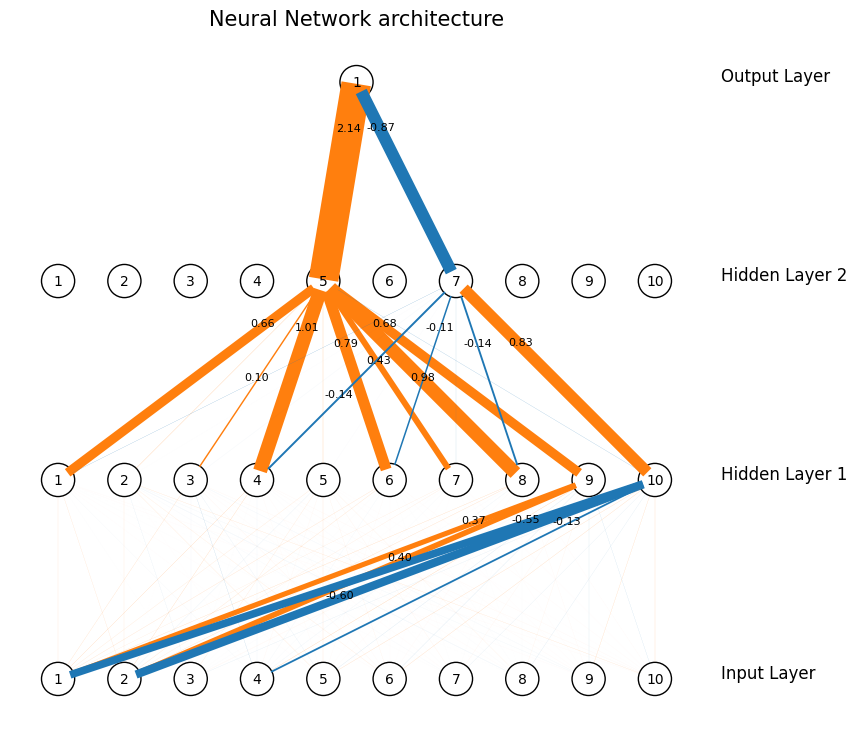

In [92]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.1, 10)
network.draw()

In [32]:
for layer in model.named_parameters():
    W = layer[1].data.cpu().numpy()
    print(W @ W.T)

[[ 2.4870118e-01  1.2936613e-09  5.2880034e-11  4.7473145e-09
  -2.1863642e-09 -2.2504105e-09  5.5440874e-09 -4.6639248e-11
  -8.4105523e-10 -6.2615393e-09]
 [ 1.2936613e-09  2.1619324e-01 -2.7838289e-09  5.4318821e-09
   2.9860516e-09 -6.4033107e-10 -5.9874661e-09 -6.0618013e-09
   6.9330497e-10 -7.4380846e-10]
 [ 5.2880034e-11 -2.7838289e-09  1.8004459e-01  3.2951406e-09
  -4.4646438e-09 -1.3156443e-09  4.4166901e-09 -3.0538512e-09
   2.2356517e-09 -1.7901258e-10]
 [ 4.7473145e-09  5.4318821e-09  3.2951406e-09  3.2979512e-01
  -8.4235996e-10 -2.5191693e-09  1.6863151e-09  4.9959072e-09
   1.2487362e-09 -3.1719682e-09]
 [-2.1863642e-09  2.9860516e-09 -4.4646438e-09 -8.4235996e-10
   3.4401336e-01  2.2257782e-09  3.7707815e-09 -2.8192617e-09
   2.8701379e-09  1.6097702e-10]
 [-2.2504105e-09 -6.4033107e-10 -1.3156443e-09 -2.5191693e-09
   2.2257782e-09  2.2611775e-02  2.2051341e-09  3.1081854e-10
   8.9528385e-10 -5.5898164e-10]
 [ 5.5440874e-09 -5.9874661e-09  4.4166901e-09  1.6863151e

In [ ]:
importlib.reload(compute_procrustes)
from scipy.stats import ortho_group

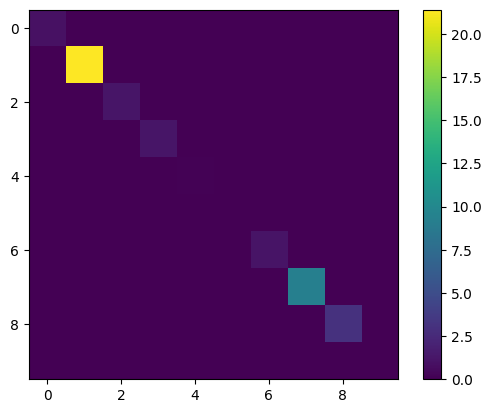

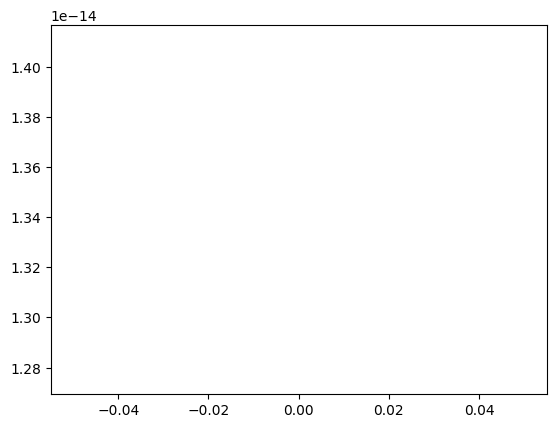

In [ ]:
W = ortho_group.rvs(10) @ np.diag(np.random.normal(0, 1, 10)**2)
A,li = compute_procrustes.compute_procrustes(W)
plt.imshow(A.T @ A)
plt.colorbar()
plt.show()
plt.plot(li[:10])

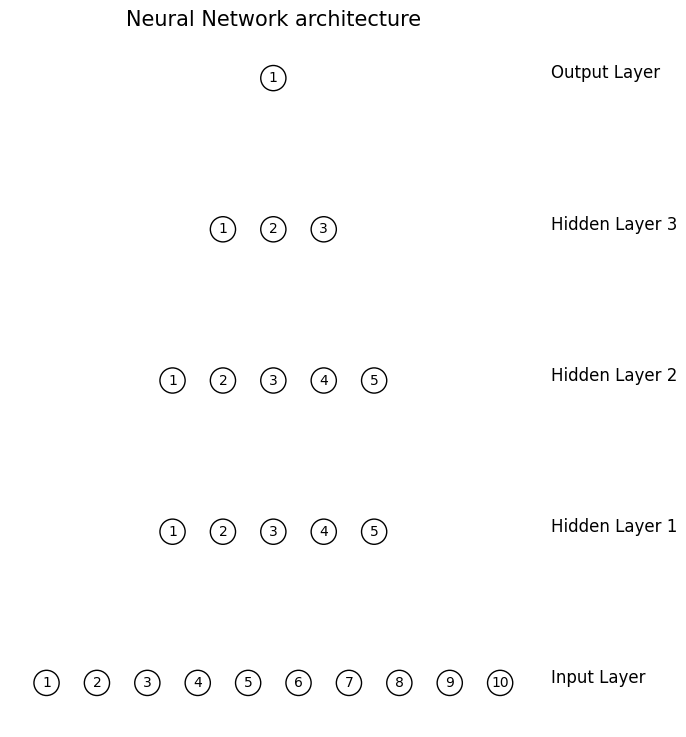

In [ ]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.2, 10)
network.draw()